# 三角板关键点检测-可视化训练日志

训练模型时在`work_dirs`目录生成记录训练日志，解析其中损失函数、评估指标等信息，并可视化。

同济子豪兄：https://space.bilibili.com/1900783

## 进入mmdetection主目录

In [1]:
import os
os.chdir('mmpose')

## 导入工具包

In [2]:
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

## 载入训练日志

In [3]:
# 日志文件路径
log_path = 'work_dirs/rtmpose-s-triangle/20230512_091723/vis_data/scalars.json'

In [4]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [5]:
len(json_list)

3330

In [6]:
eval(json_list[4])

{'lr': 0.0008421368421052633,
 'data_time': 7.156930637359619,
 'loss': 0.4120451629161835,
 'loss_kpt': 0.4120451629161835,
 'acc_pose': 0.010416666666666666,
 'time': 7.3490269660949705,
 'epoch': 1,
 'memory': 3069,
 'step': 5}

In [7]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in tqdm(json_list):
    if 'coco/AP' in each:
        df_test = df_test.append(eval(each), ignore_index=True)
    else:
        df_train = df_train.append(eval(each), ignore_index=True)

100%|██████████| 3330/3330 [00:03<00:00, 956.06it/s]


In [8]:
df_train

,lr,data_time,loss,loss_kpt,acc_pose,time,epoch,memory,step
0,4.000000e-08,7.184399,0.409065,0.409065,0.000000,7.475525,1.0,2907.0,1.0
1,2.105642e-04,7.056478,0.408980,0.408980,0.021528,7.283740,1.0,3069.0,2.0
2,4.210884e-04,7.053632,0.410440,0.410440,0.000000,7.261341,1.0,3069.0,3.0
3,6.316126e-04,7.176773,0.411571,0.411571,0.000000,7.374729,1.0,3069.0,4.0
4,8.421368e-04,7.156931,0.412045,0.412045,0.010417,7.349027,1.0,3069.0,5.0
...,...,...,...,...,...,...,...,...,...
3295,2.000861e-04,7.255662,0.015418,0.015418,1.000000,7.420977,300.0,3069.0,3296.0
3296,2.000551e-04,7.217007,0.015528,0.015528,1.000000,7.382225,300.0,3069.0,3297.0
3297,2.000310e-04,7.196119,0.015608,0.015608,1.000000,7.361423,300.0,3069.0,3298.0
3298,2.000138e-04,7.183520,0.015672,0.015672,1.000000,7.348706,300.0,3069.0,3299.0


In [9]:
df_test

,coco/AP,coco/AP .5,coco/AP .75,coco/AP (M),coco/AP (L),coco/AR,coco/AR .5,coco/AR .75,coco/AR (M),coco/AR (L),PCK,AUC,NME,data_time,time,step
0,0.012542,0.056423,0.005807,-1.0,0.012542,0.04125,0.1375,0.0375,-1.0,0.04125,0.250000,0.012500,0.391484,1.252024,1.295264,10.0
1,0.250730,0.709422,0.135027,-1.0,0.250730,0.32500,0.7500,0.2250,-1.0,0.32500,0.754167,0.027708,0.084693,1.200238,1.240065,20.0
2,0.383759,0.749133,0.331467,-1.0,0.383759,0.42875,0.7625,0.4125,-1.0,0.42875,0.745833,0.032500,0.120672,1.185951,1.224662,30.0
3,0.657094,0.970297,0.751793,-1.0,0.657094,0.70875,0.9750,0.7875,-1.0,0.70875,0.958333,0.116042,0.047438,1.176594,1.218739,40.0
4,0.771828,0.979208,0.860481,-1.0,0.771828,0.79625,0.9875,0.8750,-1.0,0.79625,0.962500,0.211458,0.035568,1.223315,1.263954,50.0
5,0.800672,1.000000,0.913893,-1.0,0.800672,0.83375,1.0000,0.9250,-1.0,0.83375,0.987500,0.145208,0.031570,1.200346,1.240617,60.0
6,0.782242,0.969415,0.874051,-1.0,0.782242,0.81375,0.9750,0.8875,-1.0,0.81375,0.954167,0.168958,0.036357,1.229760,1.270042,70.0
7,0.772424,0.979703,0.877556,-1.0,0.772424,0.79875,0.9875,0.8875,-1.0,0.79875,0.966667,0.150833,0.036533,1.153907,1.196954,80.0
8,0.795246,0.960142,0.866631,-1.0,0.795246,0.81750,0.9625,0.8750,-1.0,0.81750,0.945833,0.204167,0.062351,1.184930,1.227274,90.0
9,0.538716,0.719513,0.612003,-1.0,0.538826,0.57125,0.7250,0.6250,-1.0,0.57125,0.754167,0.136042,0.283252,1.089977,1.128615,100.0


## 导出训练日志表格

In [10]:
df_train.to_csv('训练日志-训练集.csv', index=False)
df_test.to_csv('训练日志-测试集.csv', index=False)

## 设置Matplotlib中文字体

In [11]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [12]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [13]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体


--2023-05-12 15:56:15--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 10050868 (9.6M) [application/x-font-ttf]
正在保存至: “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf”

/environment/minico 100%[===================>]   9.58M  22.4MB/s    用时 0.4s    

2023-05-12 15:56:16 (22.4 MB/s) - 已保存 “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf” [10050868/10050868])



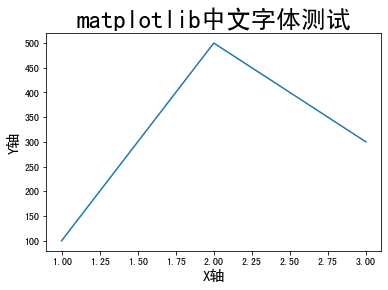

In [14]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 可视化辅助函数

In [15]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

## 训练集损失函数

In [16]:
df_train.columns

Index(['lr', 'data_time', 'loss', 'loss_kpt', 'acc_pose', 'time', 'epoch',
       'memory', 'step'],
      dtype='object')

In [17]:
metrics = ['loss', 'loss_kpt']

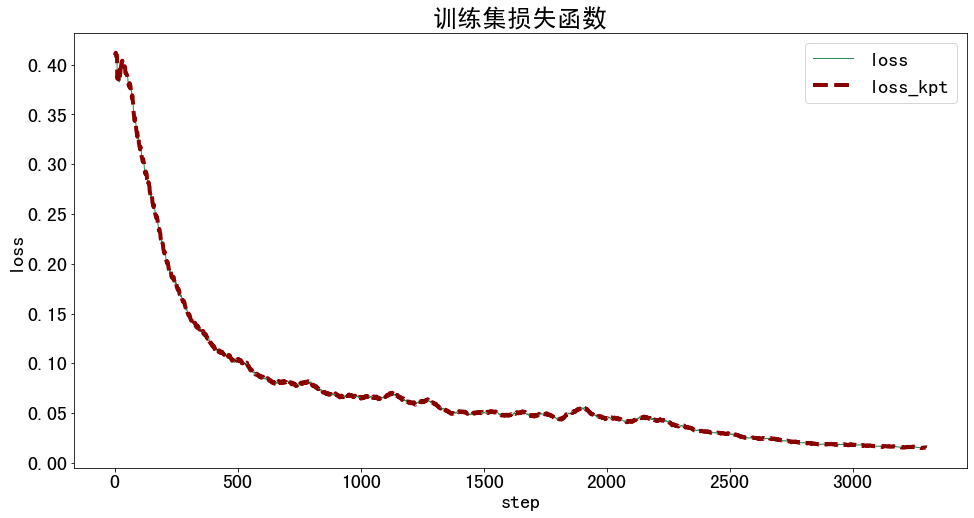

In [18]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)
plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 训练集准确率

In [19]:
metrics = ['acc_pose']

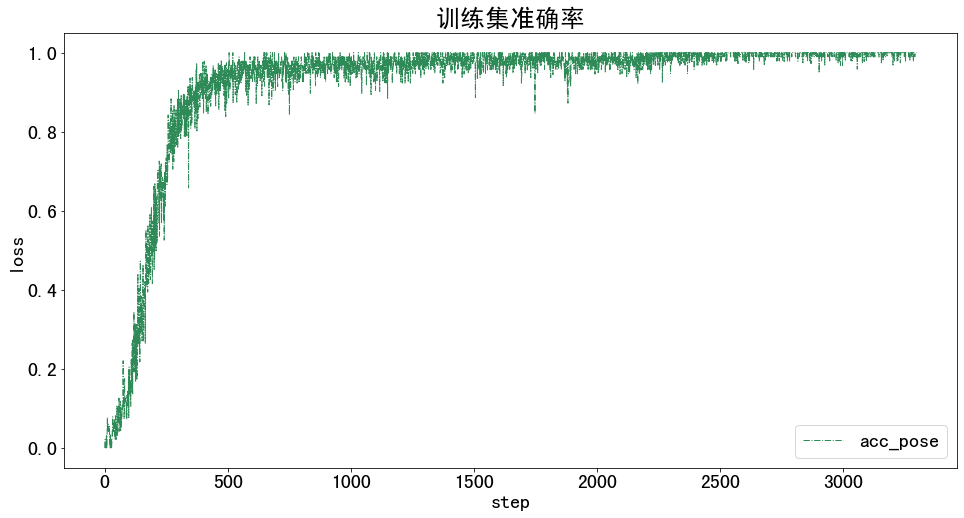

In [20]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集准确率', fontsize=25)
plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 测试集评估指标-MS COCO Metric

In [21]:
df_test.columns

Index(['coco/AP', 'coco/AP .5', 'coco/AP .75', 'coco/AP (M)', 'coco/AP (L)',
       'coco/AR', 'coco/AR .5', 'coco/AR .75', 'coco/AR (M)', 'coco/AR (L)',
       'PCK', 'AUC', 'NME', 'data_time', 'time', 'step'],
      dtype='object')

In [22]:
metrics = ['coco/AP', 'coco/AP .5', 'coco/AP .75', 'coco/AP (M)', 'coco/AP (L)', 'coco/AR', 'coco/AR .5', 'coco/AR .75', 'coco/AR (M)', 'coco/AR (L)', 'PCK', 'AUC']


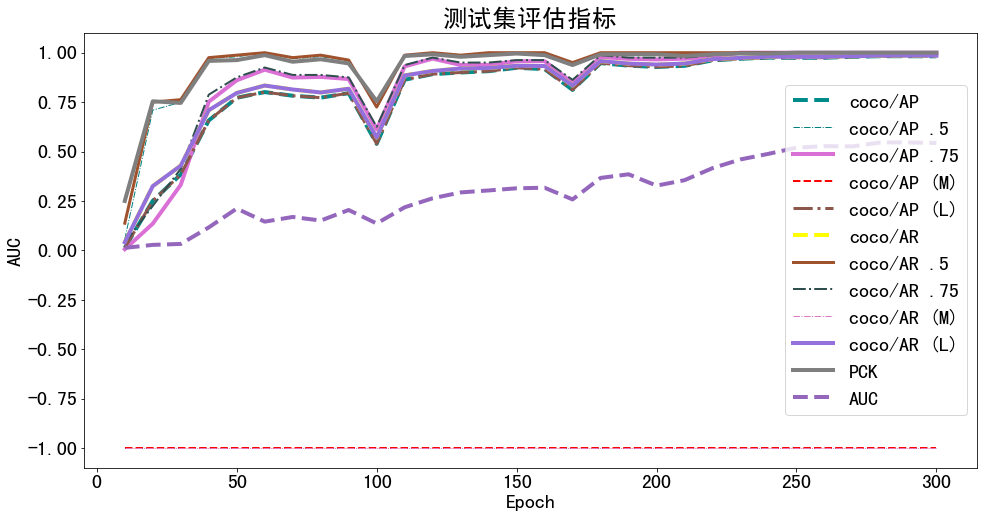

In [23]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 测试集评估指标-NME

In [24]:
metrics = ['NME']

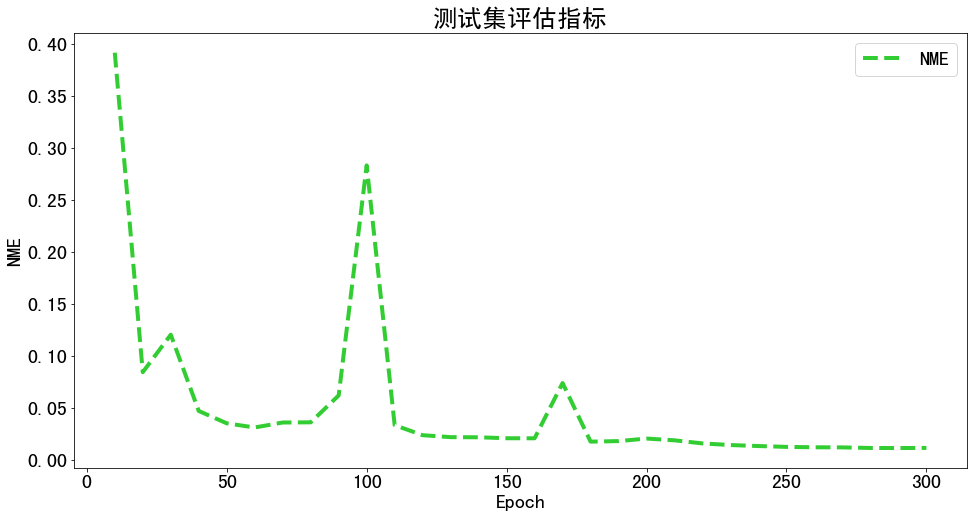

In [25]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()